In [1]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from skopt.plots import plot_objective, plot_convergence
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from preprocess import get_data


In [2]:
trainData =get_data("train/","ascii_file_counts.csv")
testData = get_data("test","ascii_file_counts.csv")
XTrain, ytrain = trainData
XTest, ytest = testData

In [3]:
model = RandomForestClassifier(random_state=42)

In [ ]:
param_space = {
    'n_estimators': (10, 500),  # Number of trees in the forest
    'max_depth': (1, 100),  # Maximum depth of each tree
    'min_samples_split': (2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': (1, 20),  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy', 'log_loss'],  # Function to measure the quality of a split
    'class_weight': ['balanced', 'balanced_subsample', None],  # Class weights for handling imbalanced datasets
}

In [9]:
bayes_opt = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=30,  # Number of iterations
    cv=5,       # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Objective: minimize error
    n_jobs=-1,  # Use all CPU cores
    random_state=42,
    verbose=3
)

In [ ]:
bayes_opt.fit(XTrain, ytrain)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 5/5] END max_depth=10, min_samples_leaf=8, min_samples_split=9, n_estimators=129;, score=-598.419 total time=  32.6s
[CV 4/5] END max_depth=10, min_samples_leaf=8, min_samples_split=9, n_estimators=129;, score=-613.455 total time=  32.6s
[CV 3/5] END max_depth=10, min_samples_leaf=8, min_samples_split=9, n_estimators=129;, score=-618.857 total time=  32.7s
[CV 1/5] END max_depth=10, min_samples_leaf=8, min_samples_split=9, n_estimators=129;, score=-607.151 total time=  32.8s
[CV 2/5] END max_depth=10, min_samples_leaf=8, min_samples_split=9, n_estimators=129;, score=-601.495 total time=  32.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 3/5] END max_depth=17, min_samples_leaf=9, min_samples_split=4, n_estimators=288;, score=-372.812 total time= 2.1min
[CV 2/5] END max_depth=17, min_samples_leaf=9, min_samples_split=4, n_estimators=288;, score=-353.540 total time= 2.1min
[CV 4/5] END max_depth=17, min_samp

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump, load

results = pd.DataFrame(bayes_opt.cv_results_)

results.to_csv("results.csv")

dump(bayes_opt._best_estimator, 'model.joblib')

n_estimators = results['param_n_estimators']
mean_test_score = results['mean_test_score']

accuracy = -mean_test_score  

sorted_indices = n_estimators.argsort()
n_estimators_sorted = n_estimators.iloc[sorted_indices]
accuracy_sorted = accuracy.iloc[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_sorted, accuracy_sorted, marker='o', linestyle='-')
plt.title('n_estimators vs Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy (Inverse of MSE)')
plt.grid(True)
plt.show()


Text(0, 0.5, 'MSE')

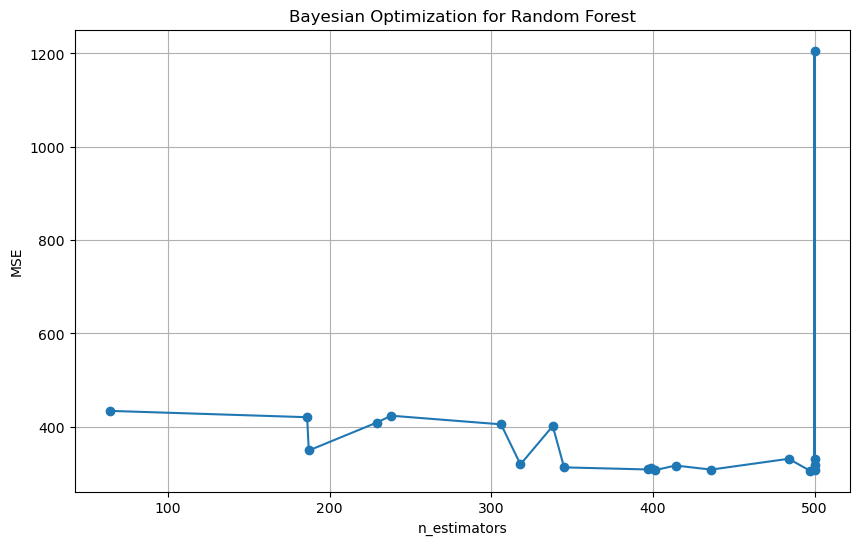

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

forest_data = pd.read_csv('RF_bayes_df.csv')
n_estimators = forest_data['param_n_estimators']
mean_test_score = forest_data['mean_test_score']
mean_test_score = -mean_test_score
sorted_indices = n_estimators.argsort()
n_estimators_sorted = n_estimators.iloc[sorted_indices]
mean_test_score_sorted = mean_test_score.iloc[sorted_indices]
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_sorted, mean_test_score_sorted, marker='o', linestyle='-')
plt.title('Bayesian Optimization for Random Forest')
plt.xlabel('n_estimators')
plt.grid()
plt.ylabel('MSE')